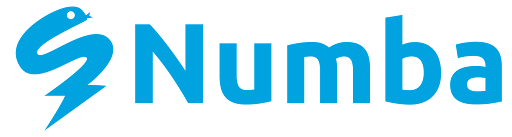

In [ ]:
from numba import jit
import numpy as np
import time
import dis

Pure Python: Function is not compiled and runs in byte code

In [ ]:
def python_trace(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace


In [ ]:
# Lets disassemble the Python function into it's byte code

Numba: Function is compiled and runs in machine code

In [ ]:
@jit(nopython=True) # <--------------- Numba decorator
def numba_trace(a):
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

In [29]:
# Peek at the numba function before compilation. Numba hasn't performed any passes on this function yet

Let's define our data

In [ ]:
x = np.random.rand(100,100)

And run the first Numba compilation pass(Warm-up)

In [ ]:
%%time

numba_trace(x) # First call JIT Compiles and caches our function

In [ ]:
%%time
python_trace(x)

In [ ]:
%%time
numba_trace(x)

In [ ]:
numba_trace.inspect_types()

Now gives a dump of the function source code annotated line-by-line with the corresponding Numba IR, and the inferred types of the various variables.